# Numerical Calculus

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## Taylor Series

Before we begin with differentiation let's remind ourselves of the very useful Taylor Series which expands any *analytic* function as a polynomial series of its derivatives at the point $a$:

$f(x-a) = f(a) + \frac{f'(a)}{1!}(x - a) + \frac{f''(a)}{2!}(x - a)^2 + \frac{f^{(3)}(a)}{3!}(x - a)^3 + \cdots$

or

$f(x-a) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!} (x - a)^n$

**TRY IT:** Plot the first 5 approximations of $\sin(x)$ around $a = 0$ on the interval $[0,\pi]$ using the Taylor series: $\sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!}$...

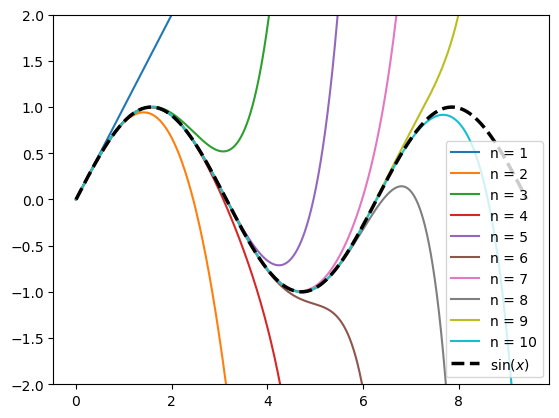

In [38]:
x = np.arange(0,3*np.pi,1e-3)
approx = np.zeros(len(x))

for i in range(0,10):
    factor = 2*i + 1
    term = (-1)**i*x**factor/sp.special.factorial(factor)
    approx += term
    plt.plot(x,approx,label = f'n = {i + 1}')

plt.plot(x,np.sin(x),label = r'$\sin(x)$',linestyle = '--',\
         linewidth = 2.5,color = 'k')
plt.ylim(-2,2)
plt.legend()

# Differentiation



#### Symbolic
- You have done it many times by hand:
    - $\frac{d}{dx} x^2$ = ?
    - $\frac{d}{dx} e^{2x}$ = ?
    
- We can also do these symbolically using the **sympy** module:

In [39]:
import sympy as smp

In [47]:
t,y,w = smp.symbols('t_0 y w',real = True)
t

t_0

In [43]:
x = smp.Function('x_w')(t)
print(smp.latex(x))
x

x_{w}{\left(t_{0} \right)}


x_w(t_0)

In [48]:
smp.diff(x**2,t)

2*x_w(t_0)*Derivative(x_w(t_0), t_0)

In [49]:
smp.diff(smp.exp(2*y))

2*exp(2*y)

In [54]:
expression = (t**2 - 1)/(t - 1)
expression
expr = (smp.sin(x)**2 + smp.cos(x)**2)
smp.simplify(expression)
smp.simplify(expr)

1

#### Partial derivatives:

$x^{2} y + \sin{\left(x y \right)}$

In [56]:
x, y = smp.symbols('x y')
f = x**2 * y + smp.sin(x * y)

# ∂f/∂x
df_dx = smp.diff(f, x)

# ∂f/∂y
df_dy = smp.diff(f, y)

print("∂f/∂x:", df_dx)
print("∂f/∂y:", df_dy)

print(smp.latex(f))
df_dx

∂f/∂x: 2*x*y + y*cos(x*y)
∂f/∂y: x**2 + x*cos(x*y)
x^{2} y + \sin{\left(x y \right)}


2*x*y + y*cos(x*y)

#### Solve the differential equation:

$\frac{d}{d t} x_{w}{\left(t \right)} = t^{2}$

In [65]:
# Define the differential equation
x = smp.Function('x')(t)
dx_dt = smp.diff(x,t)
ode = smp.Eq(dx_dt, t**2) 
# Solve the ODE
solution = smp.dsolve(ode, x)
ode
print(smp.latex(solution))

x{\left(t_{0} \right)} = C_{1} + \frac{t_{0}^{3}}{3}


#### Numerical Diff.
But how do you estimate the derivative of a function $f(x)$  *numerically* when $x$ is defined only at $discrete$ points?

# Finite Difference Approximating Derivatives

The derivative $f'(x)$ of a function $f(x)$ at the point $x=a$ is defined as:

$$f'(a) = \lim\limits_{x \to a}\frac{f(x) - f(a)}{x-a}$$

The derivative at $x=a$ is the slope at this point. In **finite difference** approximations of this slope, we can use values of the function in the neighborhood of the point $x=a$ to achieve the goal. There are various finite difference formulas used in different applications, and three of these, where the derivative is calculated using the values of two points, are presented below. 

The **forward difference** is to estimate the slope of the function at $x_j$ using the line that connects $(x_j, f(x_j))$ and $(x_{j+1}, f(x_{j+1}))$:

$$f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1}-x_j}$$

The **backward difference** is to estimate the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_j, f(x_j))$:

$$f'(x_j) = \frac{f(x_j) - f(x_{j-1})}{x_j - x_{j-1}}$$

The **central difference** is to estimate the slope of the function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_{j+1}, f(x_{j+1}))$:

$$f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1} - x_{j-1}}$$

The following figure illustrates the three different type of formulas to estimate the slope. 

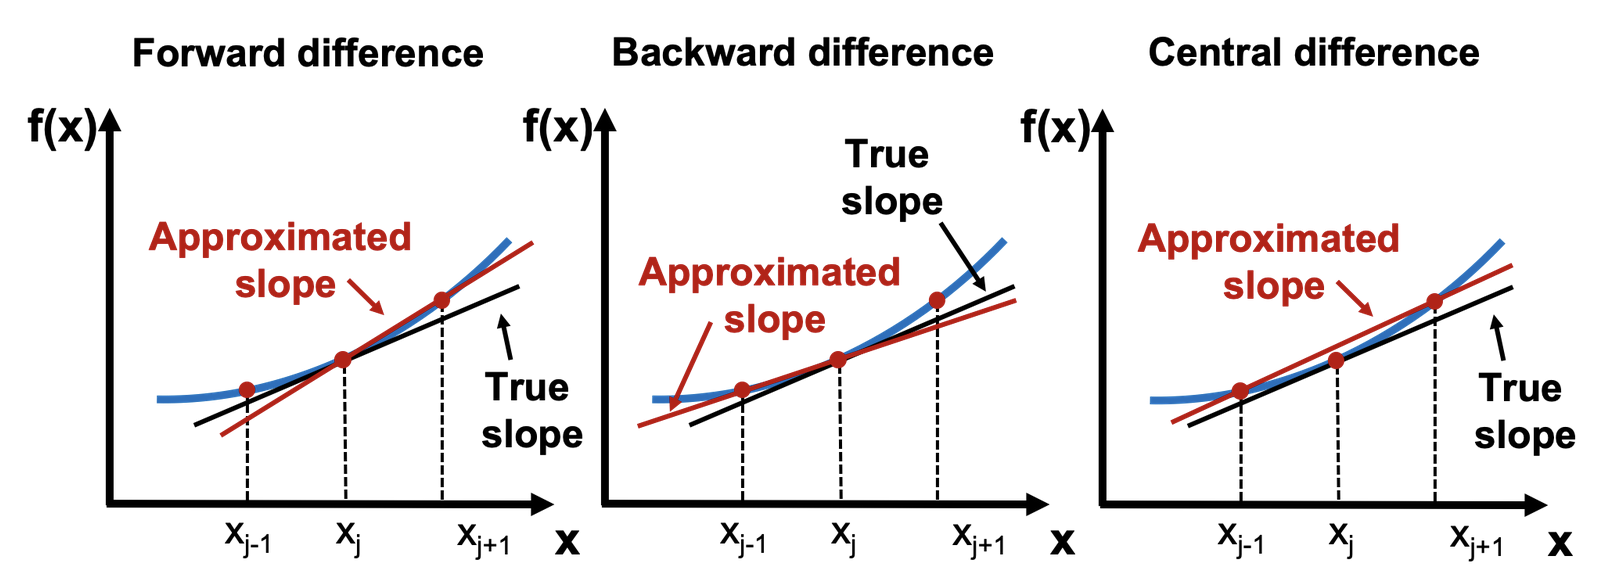

**EXAMPLE:** Let's calculate the *forward*, *backword*, and *central* differences for $y(x) = 2 * e^{-x} $

In [66]:
#make x with many small intervals:
dx = 0.01
x = np.arange( 0, 1 + dx, dx)
y = 2 * np.exp(-x)

# calculate the approximate derivative of 2*x^2 at every x:

dydxb = np.zeros( len( x ) ) #store backward here
dydxf = np.zeros( len( x ) ) #store forward here
dydxc = np.zeros( len (x ) ) #store central here

for i in range( 1, len( x ) ):
    dydxb[ i ] = ( y[ i ] - y[ i - 1 ] ) / ( x[ i ] - x[ i - 1 ] )#backward difference
    
for i in range(0,len(x) - 1):
    dydxf[ i ] = ( y[ i+1 ] - y[ i  ] ) / ( x[ i+1 ] - x[ i ] )#forward difference
    
for i in range(1, len(x) - 1):    
    dydxc[i] = (y[i+1] - y[i-1])/ (x[i+1] - x[i - 1])

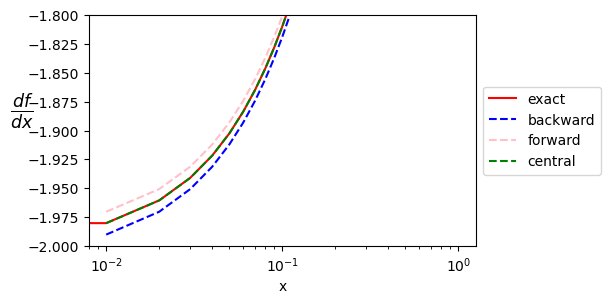

In [70]:
# plot the derivative (straight and what we just calculated):

plt.figure( figsize = ( 5 , 3 ) )
plt.plot(x, -2 * np.exp(-x)     ,color='red',\
         label = 'exact')   #do the differentiation
plt.plot(x[1:-2], dydxb[1:-2] ,color='blue',linestyle='--',\
         label = 'backward')  #check what dydx did
plt.plot(x[1:-2], dydxf[1:-2] ,color='pink',linestyle='--',\
         label = 'forward')  #check what dydx did
plt.plot(x[1:-2],dydxc[1:-2],color = "green",linestyle = "--",\
         label = 'central')
plt.ylabel(r'$\frac{df}{dx}$',fontsize = 18,rotation = 0)
plt.xlabel('x')
plt.xscale('log')
plt.ylim(-2,-1.8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Notice that this is on an x-log plot so the concavity is distorted. Also notice that the backward difference is underestimating the derivate at first, and the forward difference is overestimating at first. Is the central difference better?

## Which is better: *forward*, *backword*, or *central* difference?
To derive an approximation for the derivative of $f$, we return to Taylor series. For an arbitrary function $f(x)$ the Taylor series of $f$ around $a = x_j$ is

If $x$ is on a grid of points with spacing $h$, we can compute the Taylor series at $x = x_{j+1}$ to get

$$
f(x_{j+1}) = \frac{f(x_j)(x_{j+1} - x_j)^0}{0!} + \frac{f^{\prime}(x_j)(x_{j+1}- x_j)^1}{1!} + \frac{f''(x_j)(x_{j+1} - x_j)^2}{2!} + \frac{f'''(x_j)(x_{j+1} - x_j)^3}{3!} + \cdots.
$$

Substituting $h = (x_{j+1} - x_j) << 1$ and solving for $f^{\prime}(x_j)$ gives

$$
f^{\prime}(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} + \left(-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots\right).
$$

The terms that are in parentheses, $-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots$, are called **higher order terms** of $h$. The higher order terms can be rewritten as

$$
-\frac{f''(x_j)h}{2!} -\frac{f'''(x_j)h^2}{3!} - \cdots = h(\alpha + \epsilon(h)),
$$

where $\alpha$ is some constant, and $\epsilon(h)$ is a function of $h$ that goes to zero as $h$ goes to 0. You can verify with some algebra that this is true. We use the abbreviation "$O(h)$" for $h(\alpha + \epsilon(h))$, and in general, we use the abbreviation "$O(h^p)$" to denote $h^p(\alpha + \epsilon(h))$.


Substituting $O(h)$ into the previous equations gives

$$
f^{\prime}(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} + O(h).
$$

This gives the **forward difference** formula for approximating derivatives as

$$
f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_j)}{h},
$$

and we say this formula is of **accuracy** $O(h)$.

For an approximation that is $O(h^p)$, we say that $p$ is the **order** of the accuracy of the approximation. With few exceptions, higher order accuracy is better than lower order. To illustrate this point, assume $q < p$. Then as the spacing, $h > 0$, goes to 0, $h^p$ goes to 0 faster than $h^q$. Therefore as $h$ goes to 0, an approximation of a value that is $O(h^p)$ gets closer to the true value faster than one that is $O(h^q)$.

By computing the Taylor series around $a = x_j$ at $x = x_{j-1}$ and again solving for $f^{\prime}(x_j)$, we get the **backward difference** formula

$$
f^{\prime}(x_j) \approx \frac{f(x_j) - f(x_{j-1})}{h},
$$

which is also $O(h)$. 

For the **central difference** let's compute the Taylor series around $a = x_j$ at both $x_{j+1}$ and $x_{j-1}$. Written out, these equations are

$$
f(x_{j+1}) = f(x_j) + f^{\prime}(x_j)h + \frac{1}{2}f''(x_j)h^2 + \frac{1}{6}f'''(x_j)h^3 + \cdots
$$

and

$$
f(x_{j-1}) = f(x_j) - f^{\prime}(x_j)h + \frac{1}{2}f''(x_j)h^2 - \frac{1}{6}f'''(x_j)h^3 + \cdots.
$$

**Subtracting** the formulas above gives

$$
f(x_{j+1}) - f(x_{j-1}) = 2f^{\prime}(x_j) + \frac{2}{3}f'''(x_j)h^3 + \cdots,
$$
which when solved for $f^{\prime}(x_j)$ gives the **central difference** formula

$$
f^{\prime}(x_j) \approx \frac{f(x_{j+1}) - f(x_{j-1})}{2h}.
$$

Because of how we subtracted the two equations, the $h$ terms canceled out; therefore, **the central difference formula is $O(h^2)$, even though it requires the same amount of computational effort as the forward and backward difference formulas!** Thus the central difference formula gets an extra order of accuracy for free. 

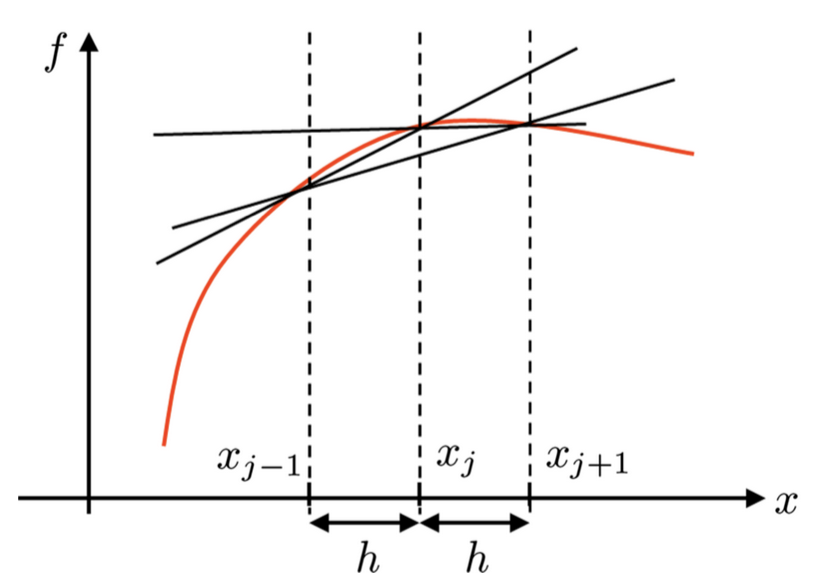


### Finite differences in numpy
Python has a command that can be used to compute finite differences directly: 
`np.diff(y)` calculates the *forward* discrete difference of your array along a given axis: `np.diff(y) = y[i+1] - y[i]`

**WARNING!** When using the command `np.diff()`, the size of the output is one less than the size of the input since it needs two arguments to produce a difference.

`np.gradient(y,dx)` calculates the central difference along an axis of the array and divides by $dx$. (It actually calculates forward and backward differences on the boundaries though)

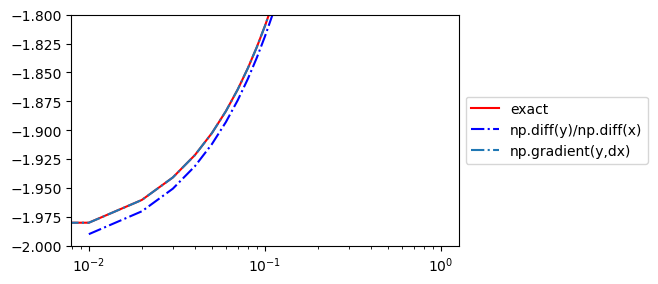

In [83]:
plt.figure( figsize = ( 5 , 3 ) )
plt.plot( x, -2 * np.exp(-x) ,color='red',label = 'exact')   #do the differentiation
plt.plot( x[ 1: ], np.diff( y ) / np.diff( x )\
         ,color='blue',linestyle='-.',\
         label = 'np.diff(y)/np.diff(x)')  #check what np.diff did
plt.plot(x,np.gradient(y,dx),label = 'np.gradient(y,dx)',linestyle='-.')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xscale('log')
plt.ylim(-2,-1.8)
plt.show()

**PRACTICE:** A mass handing from a spring bobs back and forth according to $x(t) = 8.0 ~\mathrm{cm} \cdot \cos \left(4.0 ~ \mathrm{s^{-1}} \cdot t \right)$. Plot the position, velocity, and acceleration of the mass as a function of time for the [0 s, 2 s] interval. Label your axes in SI units.

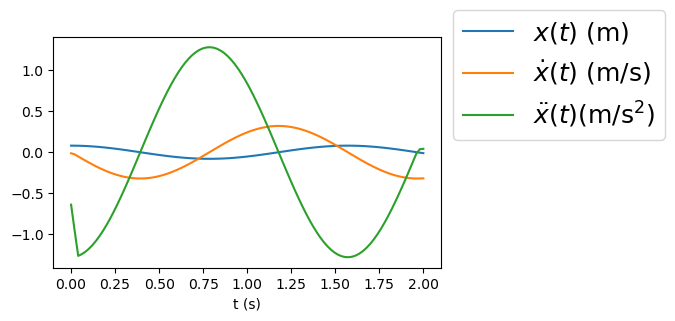

In [84]:
t = np.linspace(0,2,num = 100)
dt = t[1] - t[0]
x = 0.08*np.cos(4.0*t)
v = np.gradient(x,dt)
a = np.gradient(v,dt)
plt.figure(figsize = (5,3))
plt.plot(t,x,label = r'$x(t)$ (m)')
plt.plot(t,v,label = r'$\dot{x}(t)$ (m/s)')
plt.plot(t,a,label = r'$\ddot{x}(t) (\mathrm{m/s^2})$')
plt.xlabel('t (s)')
plt.legend(fontsize = 18,loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()

What happened at the beginning and end of a(t)??

### Improving accuracy: Math example:

**MATH EXAMPLE:** Take the Taylor series of $f$ around $a = x_j$ and compute the series at $x = x_{j-2}, x_{j-1}, x_{j+1}, x_{j+2}$. Show that the resulting equations can be combined to form an approximation for $f^{\prime}(x_j)$ that is $O(h^4)$.

First, compute the Taylor series at the specified points.

$$
\begin{eqnarray*}
f(x_{j-2}) &=& f(x_j) - 2hf^{\prime}(x_j) + \frac{4h^2f''(x_j)}{2} - \frac{8h^3f'''(x_j)}{6} + \frac{16h^4f''''(x_j)}{24} - \frac{32h^5f'''''(x_j)}{120} + \cdots\\
f(x_{j-1}) &=& f(x_j) - hf^{\prime}(x_j) + \frac{h^2f''(x_j)}{2} - \frac{h^3f'''(x_j)}{6} + \frac{h^4f''''(x_j)}{24} - \frac{h^5f'''''(x_j)}{120} + \cdots\\
f(x_{j+1}) &=& f(x_j) + hf^{\prime}(x_j) + \frac{h^2f''(x_j)}{2} + \frac{h^3f'''(x_j)}{6} + \frac{h^4f''''(x_j)}{24} + \frac{h^5f'''''(x_j)}{120} + \cdots\\
f(x_{j+2}) &=& f(x_j) + 2hf^{\prime}(x_j) + \frac{4h^2f''(x_j)}{2} + \frac{8h^3f'''(x_j)}{6} + \frac{16h^4f''''(x_j)}{24} + \frac{32h^5f'''''(x_j)}{120} + \cdots
\end{eqnarray*}
$$

To get the $h^2, h^3$, and $h^4$ terms to cancel out, we can compute

$$f(x_{j-2}) - 8f(x_{j-1}) + 8f(x_{j-1}) - f(x_{j+2}) = 12hf^{\prime}(x_j) - \frac{48h^5f'''''(x_j)}{120}$$
which can be rearranged to

$$f^{\prime}(x_j) = \frac{f(x_{j-2}) - 8f(x_{j-1}) + 8f(x_{j-1}) - f(x_{j+2})}{12h} + O(h^4).$$

This formula is a *better approximation* for the derivative at $x_j$ than the central difference formula, but requires twice as many calculations.

### Higher order derivatives:

Higher order derivatives: $\frac{d^2f}{dx^2}$, $\frac{d^3f}{dx^3}$,... can be computed by taking finite differences multiple times. For example in physics we typically compute $v = \frac{dx}{dt}$ and as a second step, we compute $a = \frac{dv}{dt}$. Clearly $a = \frac{d^2x}{dt^2}$.

**WARNING!** Computing higher order derivatives comes at a cost! In order to have the same level of accuracy we need to include more calculations as in the example above to maintain accuracy of, for example $O(h^4)$.

We can approximate the second derivative $f''(x_j)$ as follows:

Taking the Taylor series around $a = x_j$ and then computing it at $x = x_{j-1}$ and $x_{j+1}$ gives

$$
f(x_{j-1}) = f(x_j) - hf^{\prime}(x_j) + \frac{h^2f''(x_j)}{2} - \frac{h^3f'''(x_j)}{6} + \cdots$$

and

$$f(x_{j+1}) = f(x_j) + hf^{\prime}(x_j) + \frac{h^2f''(x_j)}{2} + \frac{h^3f'''(x_j)}{6} + \cdots.$$

If we **add** these two equations together, we get

$$f(x_{j-1}) + f(x_{j+1}) = 2f(x_j) + h^2f''(x_j) + \frac{h^4f''''(x_j)}{24} + \cdots,$$

and with some rearrangement gives the approximation
$$f''(x_j) \approx \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2},$$
and is $O(h^2)$.

**EXAMPLE:** Higher order derivative accuracy. Make an array $x$ of 40 values between 0 and 2$\pi$. Take $y = \sin(x)$ calculate 4 central difference derivatices using `np.gradient` and plot them. Notice the loss of acuracy between $y$ and $y""$.

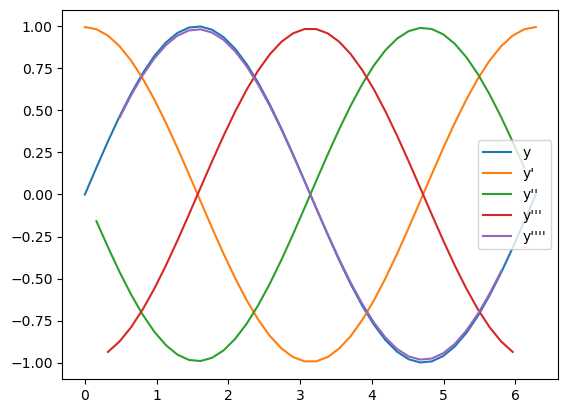

In [85]:
x = np.linspace(0,2*np.pi,num = 40)
dx = x[1] - x[0]
y = np.sin(x)
dy = np.gradient(y,dx)
d2y = np.gradient(dy,dx)
d3y = np.gradient(d2y,dx)
d4y = np.gradient(d3y,dx)

plt.plot(x,y,label = "y")
plt.plot(x,dy,label = "y'")
plt.plot(x[1:-1],d2y[1:-1],label = "y''")
plt.plot(x[2:-2],d3y[2:-2],label = "y'''")
plt.plot(x[3:-3],d4y[3:-3],label = "y''''")
plt.legend()

### Noisy signals

Let's numerically compute the derivative of a simple cosine wave corrupted noise from a series of random numbers. Consider the following function:

$$f(x) = \cos(x) + \epsilon \cdot U(-1/2,+1/2)$$

where

where $0 < \epsilon\ll1$ is a very small number and $U(-1/2,+1/2)$ randomly samples values in the interval $(-1/2, 1/2)$.

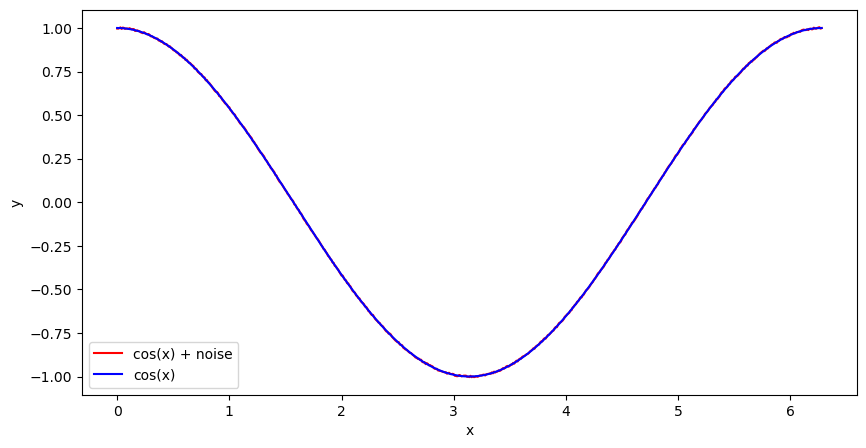

In [86]:
dx = 0.01
x = np.arange(0, 2*np.pi, dx) 
# compute function
epsilon = 0.01

y = np.cos(x) 
y_noise = y + epsilon*(np.random.random(len(x)) - 0.5)

# Plot solution
plt.figure(figsize = (10, 5))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

The noise is quite a small contribution to the overall signal but below we will see that is not the case for the 

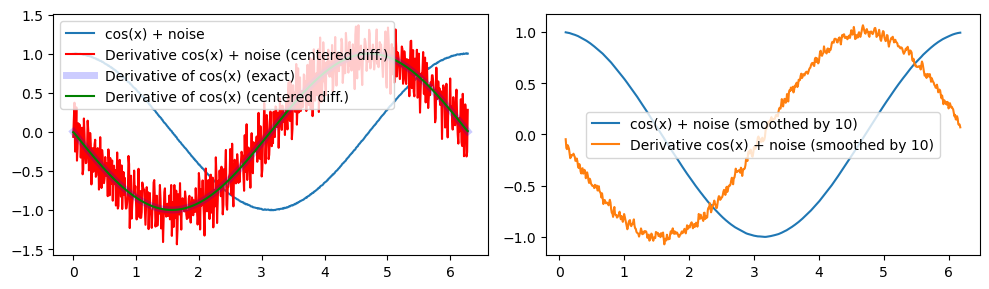

In [88]:
# compute derivatives:
dydx = -np.sin(x) #exact
dynp = np.gradient(y,dx)
dy_noise = np.gradient(y_noise,dx)

# Plot solution:
fix, (ax1,ax2) = plt.subplots(1,2,figsize = (10,3))

ax1.plot(x,y_noise,label = 'cos(x) + noise')
ax1.plot(x, dy_noise, 'r-', \
         label = 'Derivative cos(x) + noise (centered diff.)')
ax1.plot(x, dydx, 'b-',linewidth = 5, alpha = 0.2, \
         label = 'Derivative of cos(x) (exact)')
ax1.plot(x, dynp, 'g-', \
         label = 'Derivative of cos(x) (centered diff.)')

#SMOOTHING the noisy data:

window = 10 #points
boxcar = np.ones(window) / window # Create the boxcar (moving average) window
y_noise_smooth = np.convolve(y_noise, boxcar, mode='same') # Apply the convolution to smooth the data

ax2.plot(x[10:-10],y_noise_smooth[10:-10],label = 'cos(x) + noise (smoothed by 10)')
ax2.plot(x[10:-10],np.gradient(y_noise_smooth,dx)[10:-10],label =  'Derivative cos(x) + noise (smoothed by 10)')

ax1.legend()
ax2.legend()

plt.tight_layout()
plt.show()

# Riemann's Integral

- Sum of the areas of rectangles.
- Width: $x_{i+1} - x_i = h$
- Height: $f(x)$ but for which $x$: $x_{i}$ (left Riemann sum), $x_{i+1}$ (right Riemann sum), or some other choice between them. for some $x$ in the subinterval $[x_i,x_{i+1}]$.

**Left Riemann sum:**
$$\int_a^b f(x) dx \approx \sum_{i = 0}^{n-1} hf(x_i),$$

**Accuracy:**
The Taylor series of $f(x)$ around $a = x_i$ is

$$f(x) = f(x_i) + f^{\prime}(x_i)(x-x_i) + \cdots$$

Thus

$$\int_{x_i}^{x_{i+1}} f(x) dx = \int_{x_i}^{x_{i+1}} (f(x_i) + f^{\prime}(x_i)(x-x_i) + \cdots)\ dx$$

by substitution of the Taylor series for the function. Since the integral distributes, we can rearrange the right side into the following form:

$$\int_{x_i}^{x_{i+1}} f(x_i) dx + \int_{x_i}^{x_{i+1}} f^{\prime}(x_i)(x-x_i)dx + \cdots = \int_{x_i}^{x_{i+1}} f(x) dx = hf(x_i) + \frac{h^2}{2}f^{\prime}(x_i) + O(h^3)$$

which is just

$$\int_{x_i}^{x_{i+1}} f(x) dx = hf(x_i) + O(h^2).$$

Since the $hf(x_i)$ term is our Riemann integral approximation for a single subinterval, the Riemann integral approximation over a single interval is $O(h^2)$.

If we sum the $O(h^2)$ error over the entire Riemann sum, we get $nO(h^2)$. The relationship between $n$ and $h$ is

$$h = \frac{b - a}{n},$$

and so our total error becomes $\frac{b - a}{h}O(h^2) = O(h)$ over the whole interval. Thus the overall accuracy is $O(h)$.

The **Midpoint Rule** takes the rectangle height of the rectangle at each subinterval to be the function value at the midpoint between $x_i$ and $x_{i+1}$, which for compactness we denote by $y_i = \frac{x_{i+1} + x_i}{2}$. The Midpoint Rule says

$$\int_a^b f(x)dx \approx \sum_{i = 0}^{n-1} hf(y_i).$$

**Accuracy:** Using Taylor series it can be shown that with the midpoint rule

$$\int_{x_i}^{x_{i+1}} f(x) dx= hf(y_i) + O(h^3).$$

Since $hf(y_i)$ is the approximation of the integral over the subinterval, the Midpoint Rule is $O(h^3)$ for one subinterval, and using similar arguments as for the Riemann Integral, is $O(h^2)$ over the whole interval. Since the Midpoint Rule requires the same number of calculations as the Riemann Integral, we essentially get an extra order of accuracy for free!

**TRY IT!** Use the left and right Riemann Integral and the Midpoint Rule to approximate $\int_{0}^{\pi} \text{sin}(x) dx$ wtih 11 evenly spaced grid ponts over the whole interval. Compare this value to the exact value of 2.

In [13]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_riemannL = h * sum(f[:n-1])
err_riemannL = 2 - I_riemannL

I_riemannR = h * sum(f[1::])
err_riemannR = 2 - I_riemannR

I_mid = h * sum(np.sin((x[:n-1] \
        + x[1:])/2))
err_mid = 2 - I_mid

print(I_riemannL)
print(err_riemannL)

print(I_riemannR)
print(err_riemannR)

print(I_mid)
print(err_mid)

1.9835235375094546
0.01647646249054535
1.9835235375094546
0.01647646249054535
2.0082484079079745
-0.008248407907974542


# Trapezoid Rule

The **Trapezoid Rule** fits a trapezoid into each subinterval and sums the areas of the trapezoid to approximate the total integral. This approximation for the integral to an arbitrary function is shown in the following figure. For each subinterval, the Trapezoid Rule computes the area of a trapezoid with corners at $(x_i, 0), (x_{i+1}, 0), (x_i, f(x_i))$, and $(x_{i+1}, f(x_{i+1}))$, which is $h\frac{f(x_i) + f(x_{i+1})}{2}$. Thus, the Trapezoid Rule approximates integrals according to the expression

$$\int_a^b f(x) dx \approx \sum_{i=0}^{n-1} h\frac{f(x_i) + f(x_{i+1})}{2}.$$

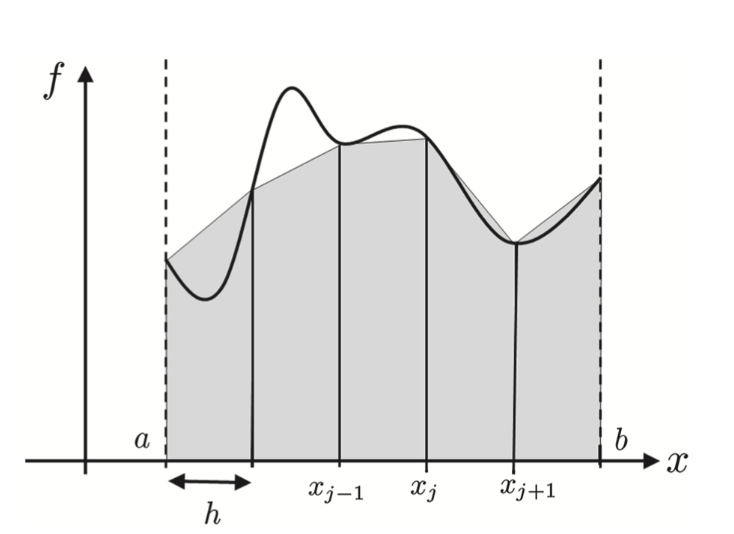

We can be more computationally efficient and avoid double counting legs using the following expression:

$$\int_a^b f(x) dx \approx \frac{h}{2} \left(f(x_0) + 2 \left(\sum_{i=1}^{n-1} f(x_i)\right) + f(x_n)\right).$$

To determine the accuracy of the Trapezoid Rule approximation, we first take Taylor series expansion of $f(x)$ around $y_i = \frac{x_{i+1} + x_i}{2}$, which is the midpoint between $x_i$ and $x_{i+1}$. This Taylor series expansion is

$$f(x) = f(y_i) + f^{\prime}(y_i)(x - y_i) + \frac{f''(y_i)(x - y_i)^2}{2!} + \cdots$$

Computing the Taylor series at $x_i$ and $x_{i+1}$ and noting that $x_i - y_i = -\frac{h}{2}$ and $x_{i+1} - y_i = \frac{h}{2}$, results in the following expressions:

$$f(x_i) = f(y_i) - \frac{hf^{\prime}(y_i)}{2} + \frac{h^2f''(y_i)}{8} - \cdots$$

and

$$f(x_{i+1}) = f(y_i) + \frac{hf^{\prime}(y_i)}{2} + \frac{h^2f''(y_i)}{8} + \cdots.$$

**Accuracy:** Following the previous arguments leads to:

$$\int_{x_i}^{x_{i+1}} f(x) dx = h \left(\frac{f(x_{i+1})+f(x_i)}{2}\right) + O(h^3).$$

Since $\frac{h}{2}(f(x_{i+1}) + f(x_i))$ is the Trapezoid Rule approximation for the integral over the subinterval, it is $O(h^3)$ for a single subinterval and $O(h^2)$ over the whole interval.

**TRY IT!** Use the Trapezoid Rule to approximate $\int_0^{\pi} \sin(x) dx$ with 11 evenly spaced grid points over
the whole interval. Compare this value to the exact value of 2.

In [14]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - I_trap

print(I_trap)
print(err_trap)

1.9835235375094546
0.01647646249054535


# Simpson's Rule

Consider *two* consecutive subintervals, $[x_{i-1}, x_i]$ and $[x_i, x_{i+1}]$. **Simpson's Rule** approximates the area under $f(x)$ over these two subintervals by fitting a quadratic polynomial through the points $(x_{i-1}, f(x_{i-1})), (x_i, f(x_i))$, and $(x_{i+1}, f(x_{i+1}))$, which is a unique polynomial, and then integrating the quadratic exactly. The following shows this integral approximation for an arbitrary function.

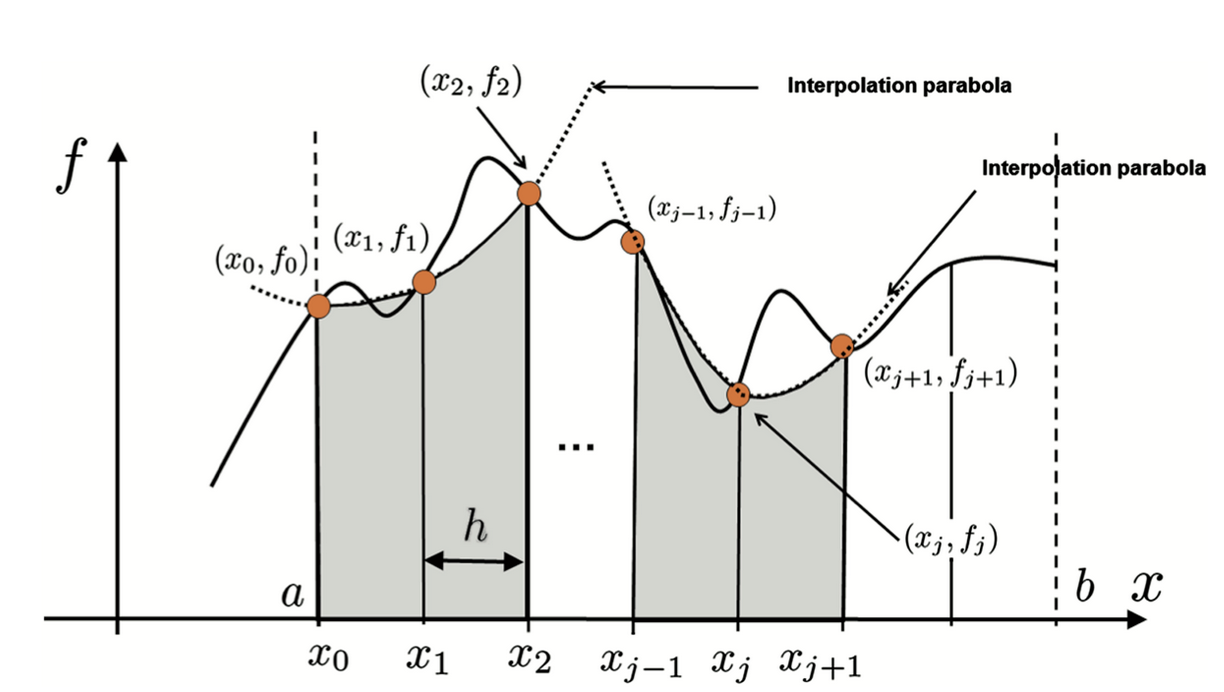

Without going through the details, we get:

$$\int_{x_{i-1}}^{x_{i+1}} P_i(x) dx = \frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1}).$$

To approximate the integral over $(a, b)$, we must sum the integrals of $P_i(x)$ over every *two* subintervals since $P_i(x)$ spans two subintervals. Substituting $\frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1}))$ for the integral of $P_i(x)$ and regrouping the terms for efficiency leads to the formula

$$\int_a^b f(x) dx \approx \frac{h}{3} \left[f(x_0)+4 \left(\sum_{i=1, i\  {\text{odd}}}^{n-1}f(x_i)\right)+2 \left(\sum_{i=2, i\  {\text{even}}}^{n-2}f(x_i)\right)+f(x_n)\right].$$

**WARNING!** Note that to use Simpson's Rule, you **must** have an even number of intervals and, therefore, an odd number of grid points.

**Accuracy:** Using the Taylor series and a bit of algebra/calculus results in the integral expression:

$$\int_{x_{i-1}}^{x_{i+1}} f(x) dx = \frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1})) + O(h^5).$$

Recognizing that $\frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1}))$ is exactly the Simpson's Rule approximation for the integral over this subinterval, this equation implies that Simpson's Rule is $O(h^5)$ over a subinterval and $O(h^4)$ over the whole interval. Because the $h^3$ terms cancel out exactly, Simpson's Rule gains another *two* orders of accuracy!

**TRY IT!** Use Simpson's Rule to approximate $\int_{0}^{\pi} \text{sin} (x)dx$ with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2.

In [15]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


# Computing Integrals in Python

The `scipy.integrate` sub-package has several functions for computing integrals. The `trapz` takes as input arguments an array of function values $f$ computed on a numerical grid $x$.

**TRY IT!** Use the `trapz` function to approximate $\int_{0}^{\pi}\text{sin}(x)dx$ for 11 equally spaced points over the whole interval. Compare this value to the one computed in the early example using the Trapezoid Rule. 

In [203]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094542
1.9835235375094546


Sometimes we want to know the approximated cumulative integral. That is, we want to know $F(X) = \int_{x_0}^X f(x) dx$. For this purpose, it is useful to use the `cumtrapz` function `cumsum`, which takes the same input arguments as `trapz`. 

**TRY IT!** Use the `cumtrapz` function to approximate the cumulative integral of $f(x) = \text{sin}(x)$ from $0$ to $\pi$ with a discretization step of 0.01. The exact solution of this integral is $F(x) = sin(x)$. Plot the results. 

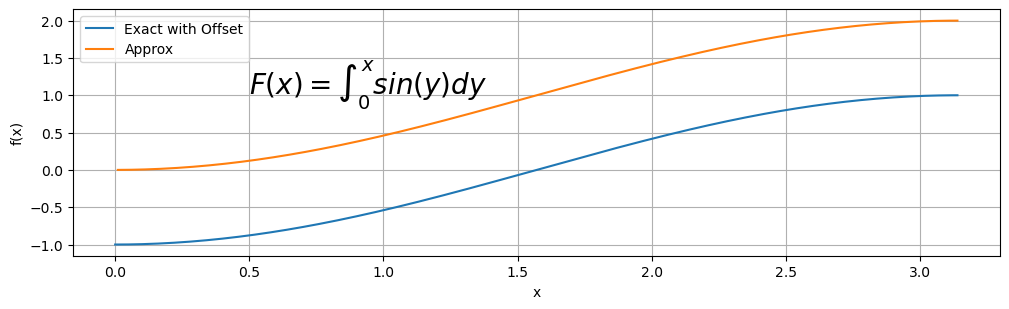

In [272]:
x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,3))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.text(0.5,1,'$F(x) = \int_0^{x} sin(y) dy$',fontsize = 20)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

The `quad(f,a,b)` function uses a different numerical differentiation scheme to approximate integrals.

**NOTICE:** `quad` integrates the function defined by the *function object*, $f$, from $a$ to $b$.

**TRY IT!** Use the `integrate.quad` function to compute $\int_{0}^{\pi} \text{sin}(x)dx$. Compare your answer with the correct answer of 2.

In [16]:
from scipy.integrate import quad 

I_quad, est_err_quad = quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0


**PRACTICE:** Can you use the Midpoint Rule to integrate: $\int_0^{1} |2\sin(2  \pi  x)| dx$ ?
How about using quad?

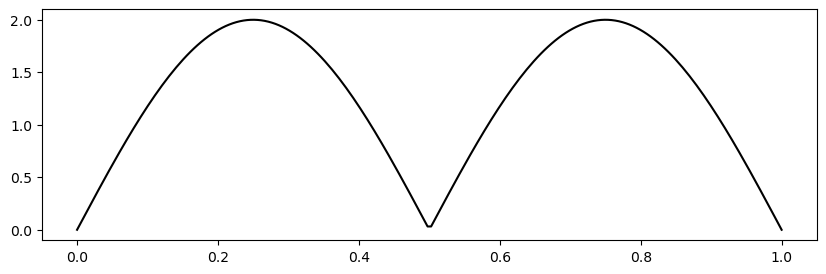

In [295]:
x = np.linspace(0,1.0000,200)
y = np.abs(2 * np.sin( 2 * np.pi * x ))

#First practice plt.plot and visualize the function:
plt.figure( figsize= (10, 3) )
plt.plot( x, y,'k-' )
plt.show()

In [234]:
#let's split it in N blocks of width dx[i] and height y[i]:

sum_int = 0                      #set the  value of your integral to zero

for i in range(len( x ) - 1 ):   #scan array x 
    d = x[ i + 1 ] - x[ i ]      # for every step get the base of your block 
    x_avg = 0.5*(x[i+1]+x[i])
    h = np.abs(2*np.sin(2*np.pi*x_avg))    # calculate the height of your block (i.e., where your function is) 
    sum_int += d * h             #calculate surface of block and add to integral valus


#now with quad:

def y(x):
    return np.abs(2*np.sin(2*np.pi*x))

I_quad, est_err_quad = quad(y, 0, 1)

print(sum_int,I_quad)

1.273213100910486 1.2732395447351628


### Multiple integrals:
**EXAMPLE:** Find the total mass of a small spherical asteroid with a radius $R$ and density profile $\rho (r) = \rho_0 (1 - \alpha \frac{r}{R}) $ and where $\rho_0, \alpha$ are constants. What is the total mass of the sphere if you know that: $M_{tot} = \int_0^{2\pi} \int_0^{\pi} \int_0^R \rho(r) r^2 \sin \phi ~dr ~d\phi ~d\theta $ ?

(and the volume element is $dV = dr \times r d \phi \times r \sin \phi ~ d \theta$)

Assume $R$ = 100 m , $\alpha = 0.10$ and $\rho_0$ = 3200 kg/m$^3$


How are you going to set this up? For loops?

**PRACTICE:**  A mass of $0.2$ kg is hanging from the end of a spring with a constant $k=3.5$ N/m. You let the mass go, and the mass-spring system starts oscillating.  Assume that $x_0 = 0$ m and $v_0 = 0$ m/s. Remember that $g = 9.8 \mathrm{m/s^2}$, and that the force applied on the mass by the gravity-spring system is:

$F_{net} = −mg - kx = ma$ . 

**GOAL:** Plot the oscillation of the mass over time with `t=np.linespace(0,4,100)` 

1. Create a function oscillation(x0,t0,v0,k,m,g,t) that takes as input the initial position x0 of the object at time t0, its initial speed u0, the parameters k, m and g and the time at which you want to calculate the location of the mass t, and returns the corresponding location of the object x. 

**Tip 1:** Remember that $F_{net}=ma=m \frac{d^2x}{d^2t}$.  
**Tip 2:** To make the problem more tractable, n split the second order derivative into two first order differences ( $\frac{\Delta x}{\Delta t}$  and $\frac{\Delta v}{\Delta t}$ ).



# Differential Equations:

`solve_ivp` allows one to solve a system of ordinary differential equations (ODEs).  Let's look at a projectile motion example *WITH* air resistance included:

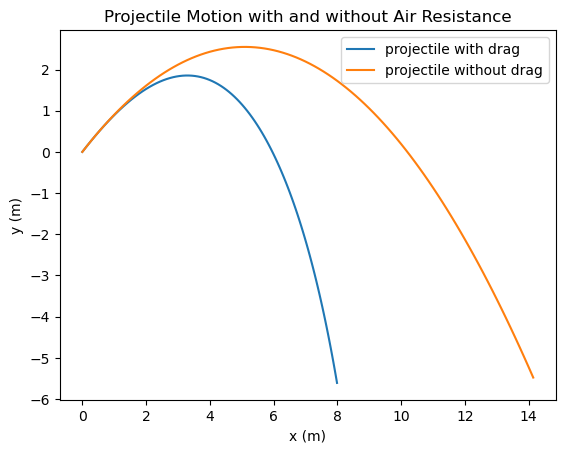

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
g = 9.81  # m/s^2
m = 1.0   # kg
k = 0.1   # Drag coefficient

# Differential equations
def equations(t, state):
    x, y, vx, vy = state
    v = np.sqrt(vx**2 + vy**2)
    ax = -k * v * vx / m
    ay = -g - k * v * vy / m
    return [vx, vy, ax, ay]

# Initial conditions
x0 = 0
y0 = 0
v0 = 10
theta = np.pi / 4
vx0 = v0 * np.cos(theta)
vy0 = v0 * np.sin(theta)

# Time span
t_span = (0, 2)

# Solve the differential equations
sol = solve_ivp(equations, t_span, [x0, y0, vx0, vy0], t_eval=np.linspace(*t_span, 100))
k = 0
sol_nd = solve_ivp(equations, t_span, [x0, y0, vx0, vy0], t_eval=np.linspace(*t_span, 100))

# Plot the trajectory
plt.plot(sol.y[0], sol.y[1], label = 'projectile with drag')
plt.plot(sol_nd.y[0], sol_nd.y[1], label = 'projectile without drag')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Projectile Motion with and without Air Resistance')
plt.legend()
plt.show()